In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from data import Data
from brutforce import Brutforce
from visualizer import Visualizer
from average_approximation import AverageApproximation
from approximation import Approximation

# Create Data

In [3]:
num_bells = 3
num_teams = 3
T = 15
data = Data(T=T, num_bells=num_bells, num_teams=num_teams)

# print(data.plane_services)
for line in data.plane_services:
    print([int(x) for x in line])

print([sum(line) for line in data.plane_services])

[2, 10, 3]
[10, 2, 3]
[7, 7, 8]
[np.int64(15), np.int64(15), np.int64(22)]


# Brut force

In [4]:
bruteforce = Brutforce(data)

In [5]:
bruteforce = Brutforce(data)
sol = bruteforce.solve()

print(sol[0])
print(sol[1])
print(sol[2])

42.0
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]]
[np.int64(2), np.int64(10), np.int64(12)]


In [6]:
visualizer = Visualizer(bruteforce)

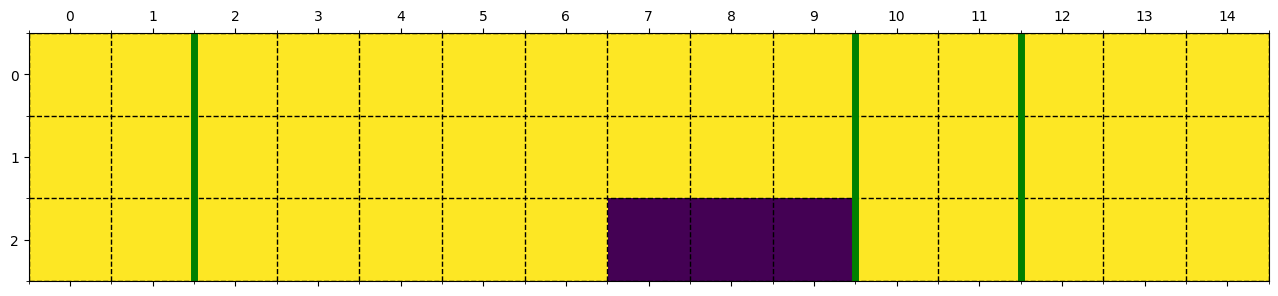

In [7]:
visualizer = Visualizer(bruteforce)
visualizer.show_schedule()

## Approximation 

In [16]:
approximation = Approximation(data)
approx_sol = approximation.solve()

print(approx_sol[0])
print(approx_sol[1])
print(approx_sol[2])

36.0
[[1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[7, 14, 15]


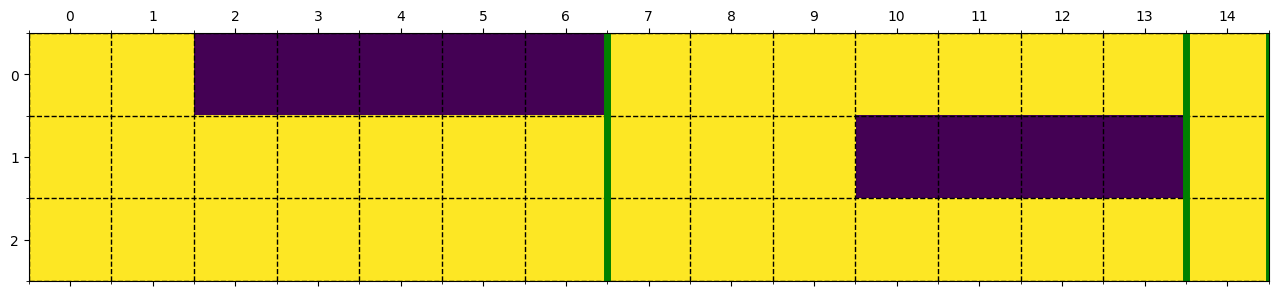

In [17]:
visualizer = Visualizer(approximation)
visualizer.show_schedule()

NameError: name 'bruteforce' is not defined

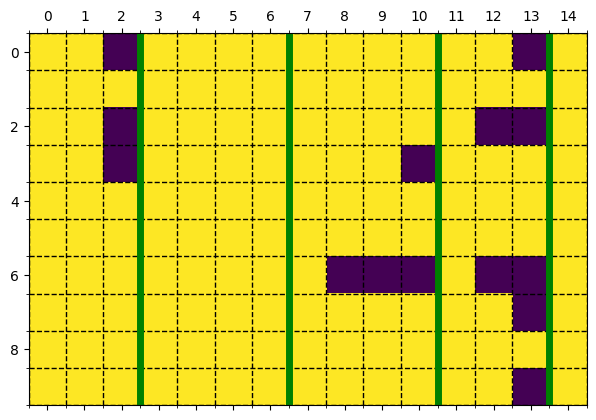

In [ ]:
# import gurobipy as grb

# service_times = data.plane_services 

# model = grb.Model("Airplane_Servicing")

# # Decision Variables:
# x = model.addVars(
#     range(len(service_times)), range(num_teams), vtype=grb.GRB.BINARY, name="x"
# )  # Binary variable for servicing completion
# b = model.addVars(
#     range(1, num_bells + 1), vtype=grb.GRB.INTEGER, name="b"
# )  # Integer variable for bell times
# z = model.addVars(
#     range(len(service_times)), range(1, num_bells + 1), vtype=grb.GRB.BINARY, name="z"
# )  # Binary variable for bell ringing at departure

# # Objective Function: Maximize total service time
# model.setObjective(
#     grb.quicksum(
#         x[p][t] * service_times[t][p]
#         for t in range(num_teams)
#         for p in range(len(service_times[t]))
#     ),
#     grb.GRB.MAXIMIZE,
# )


# # 1. Departure Time Constraint
# for p in range(len(service_times)):
#     model.addConstr(service_times[0][p] <= T, f"DepartureTime_{p}")

# # 2. Service Completion and Bell Timing
# for p in range(len(service_times)):
#     for t in range(num_teams):
#         model.addConstr(
#             x[p, t] <= grb.quicksum(z[p, i] for i in range(1, num_bells + 1)),
#             f"ServiceCompletion_{p}_{t}",
#         )

# # 3. Bell-Time Matching Constraints
# M = 10000  
# for p in range(len(service_times)):
#     for i in range(1, num_bells + 1):
#         model.addConstr(
#             b[i] - service_times[0][p] <= M * (1 - z[p, i]), f"BellMatching1_{p}_{i}"
#         )
#         model.addConstr(
#             service_times[0][p] - b[i] <= M * (1 - z[p, i]), f"BellMatching2_{p}_{i}"
#         )

# # 4. Bell Ring Limits
# for i in range(1, num_bells + 1):
#     model.addConstr(b[i] <= T, f"BellTimeLimit_{i}")
#     if i < num_bells:
#         model.addConstr(b[i] <= b[i + 1], f"BellSequential_{i}")

# # 5. Service Order Constraints
# for t in range(num_teams):
#     for p in range(len(service_times[t])):
#         for q in range(p + 1, len(service_times[t])):
#             model.addConstr(x[p, t] < x[q, t], f"ServiceOrder_{p}_{q}_{t}")


# model.optimize()

# if model.status == grb.GRB.OPTIMAL:
#     print("Optimal Solution:")
#     for p in range(len(service_times)):
#         for t in range(num_teams):
#             if x[p, t].x > 0.5:  # x[p, t] is binary
#                 print(f"Airplane {p} serviced by team {t}")
#     for i in range(1, num_bells + 1):
#         print(f"Bell {i} rings at time {b[i].x}")
# else:
#     print("No optimal solution found.")

In [20]:
import time
import matplotlib.pyplot as plt

def evaluate_solver_time(solver):
    start_time = time.time()
    solver.solve()
    end_time = time.time()
    running_time = end_time - start_time
    return running_time

In [18]:
def evaluate(num_teams, num_bells_values, time_horizon):
    bruteforce_times = []
    # gurobi_times = []
    approximation_times = []

    for num_bells in num_bells_values:
        print(f"Running for {num_bells} bells")
        data = Data(T=time_horizon, num_bells=num_bells, num_teams=num_teams)

        bruteforce = Brutforce(data)
        # gurobi_solver = GurobiSolver(data)
        approximation = Approximation(data)

        bruteforce_time = evaluate_solver_time(bruteforce)
        # gurobi_time = evaluate_solver_time(gurobi_solver)
        approximation_time = evaluate_solver_time(approximation)

        bruteforce_times.append(bruteforce_time)
        # gurobi_times.append(gurobi_time)
        approximation_times.append(approximation_time)

    plt.figure(figsize=(10, 6))
    plt.plot(
        num_bells_values,
        bruteforce_times,
        label="Bruteforce",
        marker="o",
        color="magenta",
    )
    # plt.plot(
    #     num_bells_values,
    #     bruteforce_times,
    #     label="Gurobi Solver",
    #     marker="x",
    #     color="green",
    # )

    plt.plot(
        num_bells_values,
        approximation_times,
        label="Approximation",
        marker="s",
        color="blue",
    )

    plt.xlabel("Number of Bells")
    plt.ylabel("Running Time (seconds)")
    plt.title(f"Solver Performance for {num_teams} Teams with max time {time_horizon} seconds")
    plt.legend()
    plt.grid()
    plt.show()

Running for 1 bells
Running for 2 bells
Running for 3 bells
Running for 4 bells
Running for 5 bells


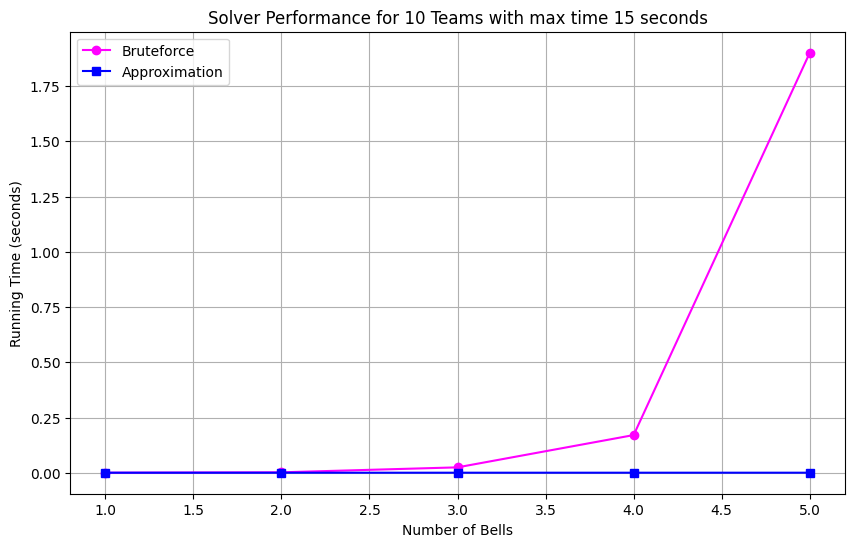

In [21]:
num_teams = 10  
num_bells_values = range(1, 6)
time_horizon = 15
evaluate(num_teams, num_bells_values, time_horizon)

In [ ]:
def greedy_approximation()

# Approximation

In [16]:
approximation = AverageApproximation(data)

approximation.solve()

(93.0,
 array([[1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.]]),
 [3, 6, 9])

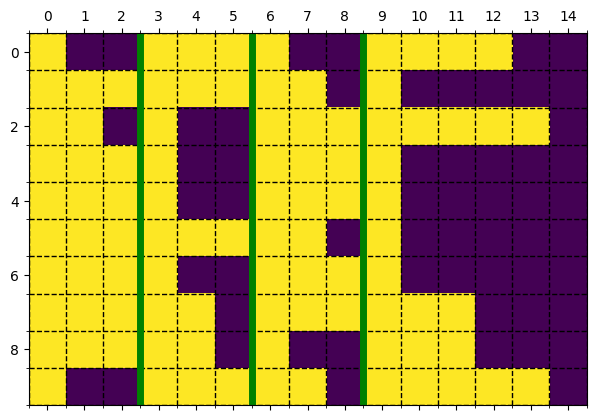

In [17]:
visualizer = Visualizer(approximation)

visualizer.show_schedule()